In [2]:
from pathlib import Path
import numpy as np

import matplotlib as mpl
from matplotlib.axes import Axes
import matplotlib.pyplot as plt

import seaborn as sns

sns.set_theme()
mpl.rc(
    "figure",
    dpi=150,
    # Use tight layout
    autolayout=True,
)
mpl.rc("text", usetex=True)
mpl.rc("font", family="Helvetica")

FIGURES_DIR = Path("../../tex/figures")

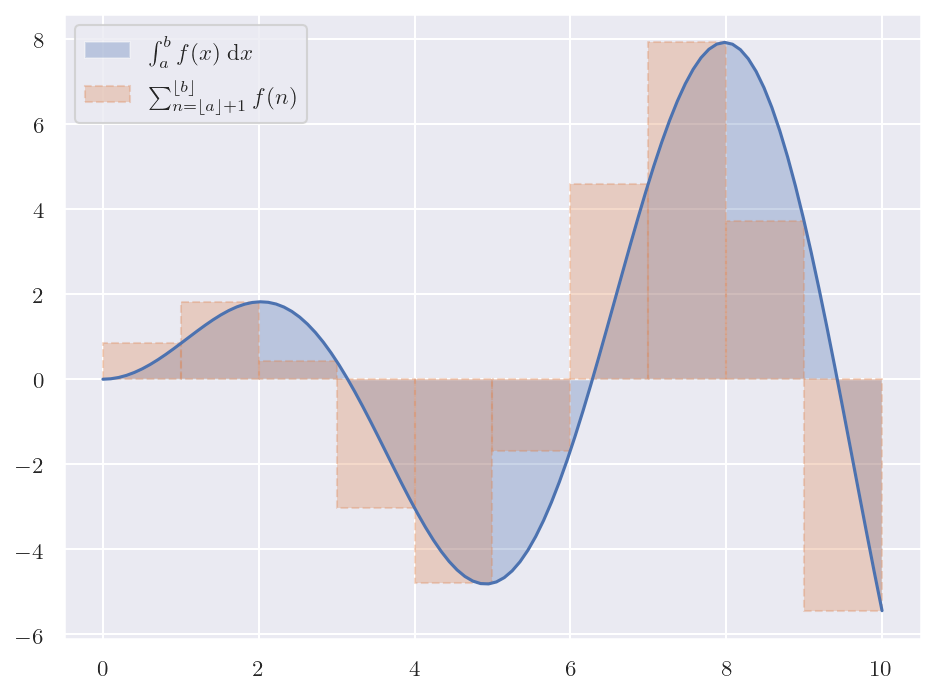

In [5]:
ax: Axes
fig, ax = plt.subplots(1, 1)

a = 0
b = 10
x = np.linspace(a, b, 100)


def f(x: np.ndarray) -> np.ndarray:

    return x * np.sin(x)


# Plot the function
ax.plot(
    x,
    f(x),
)

ax.fill_between(
    x,
    f(x),
    label="$\int_a^b f(x) \; \mathrm{d} x$",
    alpha=0.3,
)

for index, x in enumerate(np.arange(a + 1, b + 1)):

    # Calculate the value at the integer point
    value = f(x)

    # Add a label
    if index == 0:
        label = "$\sum_{n=\lfloor a \\rfloor + 1}^{\lfloor b \\rfloor} f(n)$"
    else:
        label = None

    ax.fill_between(
        (x - 1, x),
        (value, value),
        color="C1",
        alpha=0.3,
        linestyle="--",
        label=label,
    )

ax.legend()
plt.show()


fig.savefig(FIGURES_DIR / "euler-summation-formula.png")